## Outlier correction
**Can be merged with data_cleaning.ipynb**

In [30]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

RSEED = 42

In [31]:
df = pd.read_csv("data/data_clean.csv", index_col=0)

---
### needs to be included in data.cleaning.ipynb

In [32]:
df['staff_pick'] = df['staff_pick'].apply(lambda x: 1 if x == True else 0)

---

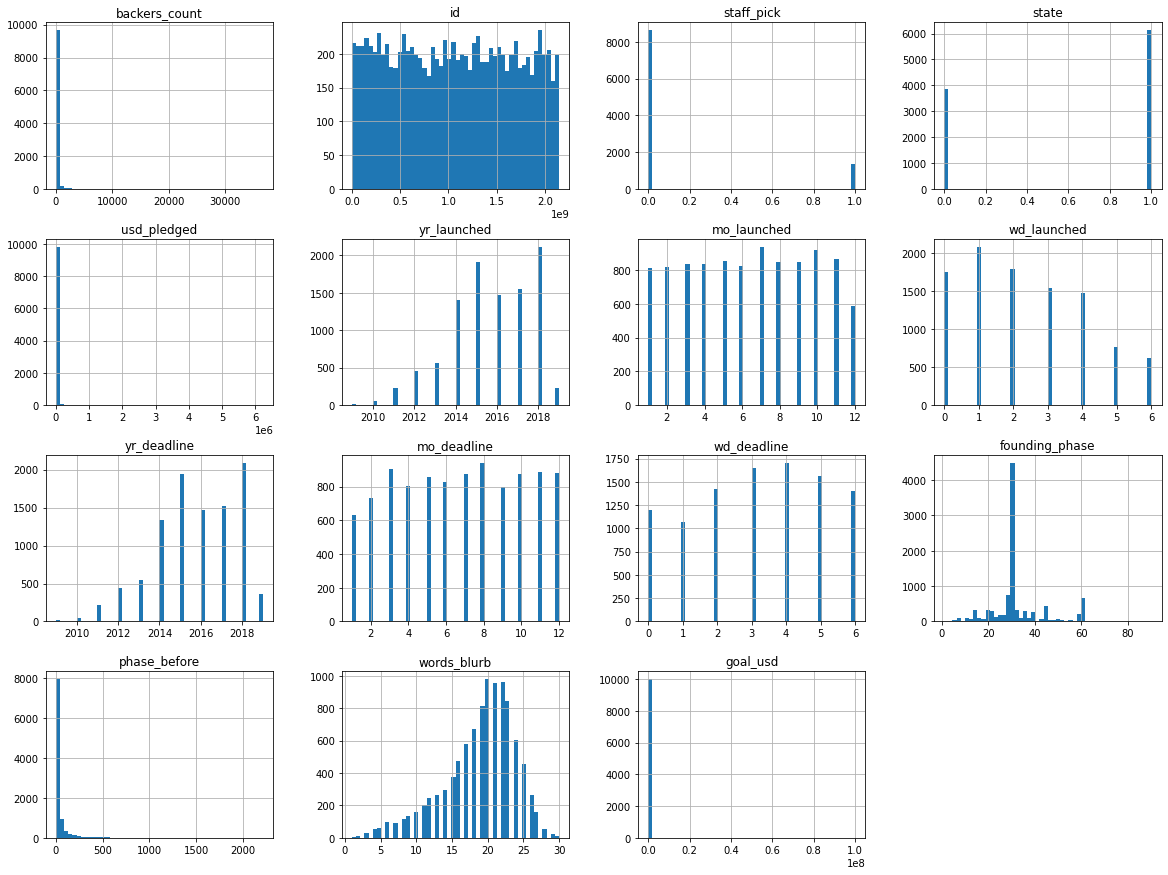

In [33]:
# randomly subset data for histograms (full data too much data)
subset = df.sample(n=10000, random_state=RSEED, axis=0)

# plot histograms
subset.hist(bins=50, figsize = (20,15))
plt.show()

From the histograms and describe() we see that 'phase_before', 'usd_pledged' and 'goal_usd' contain a few high values. As these outliers affect the data distribution more than the other samples. Therefore we will remove the highest 1.5% samples of each of the described features.

In [34]:
# get 98.5% quantile (highest 1.5%) of 'phase_before', 'usd_pledged', 'goal_usd'
q_hi1  = df["phase_before"].quantile(0.985)
q_hi2  = df["usd_pledged"].quantile(0.985)
q_hi3  = df["goal_usd"].quantile(0.985)

# remove highest 1.5% percent of the data with the 98.5% quantiles
df_filtered = df[(df["phase_before"] < q_hi1) & (df["usd_pledged"] < q_hi2) & (df["goal_usd"] < q_hi3)]

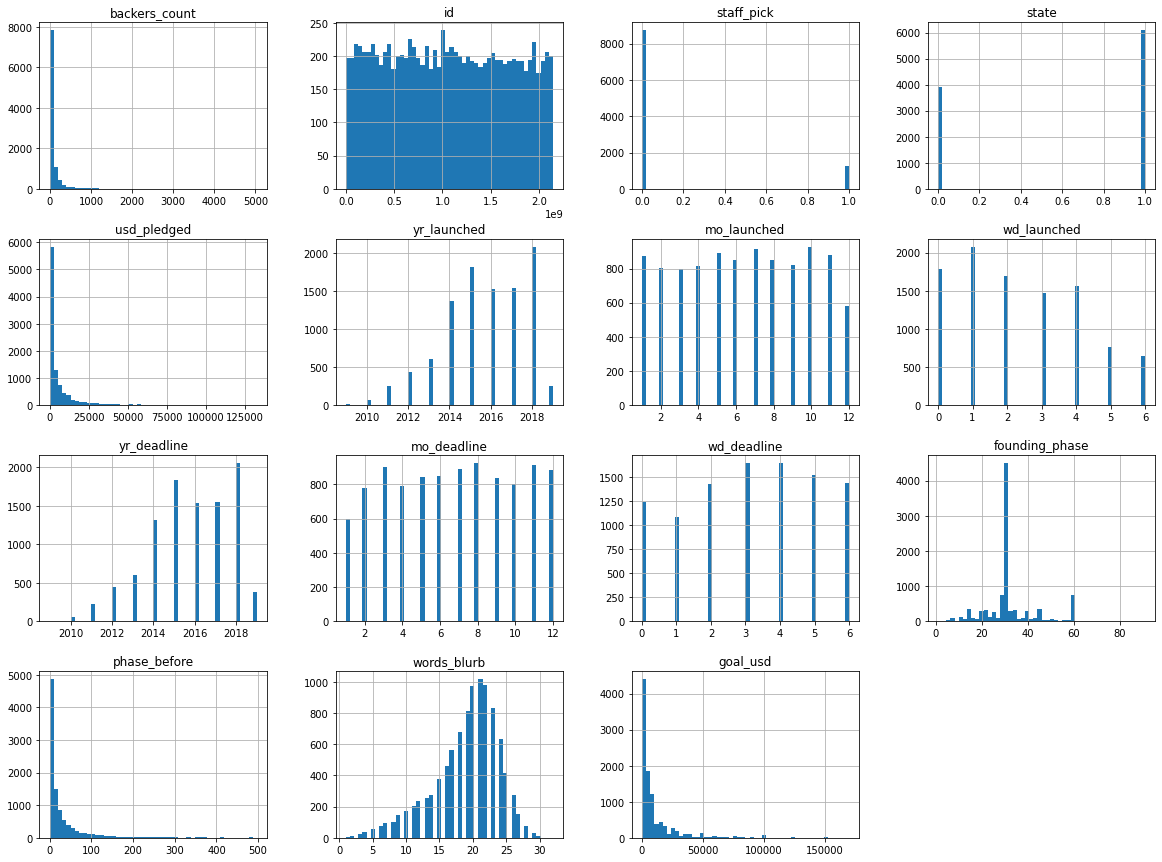

In [35]:
# make a random subset of filtered data
subset1 = df_filtered.sample(n=10000, random_state=RSEED, axis=0)

# plot histograms again
subset1.hist(bins=50, figsize = (20,15))
plt.show()

In [36]:
# check how much data is left
percent = ((df.shape[0]-df_filtered.shape[0])/df.shape[0])*100
print(f'Number of rows before outlier correction: {df.shape[0]}')
print(f'Number of rows after outlier correction: {df_filtered.shape[0]}')
print(f'Number of removed rows: {df.shape[0]-df_filtered.shape[0]}')
print(f'Outlier correction removed {round(percent,1)} percent of the data')

Number of rows before outlier correction: 192664
Number of rows after outlier correction: 184367
Number of removed rows: 8297
Outlier correction removed 4.3 percent of the data


In [40]:
# save dataframe
df_filtered.to_csv("data/data_clean_outlier.csv")